In [1]:
import polars as pl
from lib import preprocess_data, generate_plot
import os

# Load data and Preprocessing to get AAPL stock

In [2]:
stock_AAPL = preprocess_data()

# Check if DataFrame is empty
assert stock_AAPL.height > 0, "The stock_AAPL DataFrame is empty."
# Check if 'Year' column exists
assert "Year" in stock_AAPL.columns, "'Year' column is missing in stock_AAPL DataFrame."

print(type(stock_AAPL), stock_AAPL)

<class 'polars.dataframe.frame.DataFrame'> shape: (2_943, 9)
┌────────────┬────────────┬────────────┬────────────┬───┬────────────┬───────────┬──────┬──────┐
│ Date       ┆ Open       ┆ High       ┆ Low        ┆ … ┆ Adj Close  ┆ Volume    ┆ Name ┆ Year │
│ ---        ┆ ---        ┆ ---        ┆ ---        ┆   ┆ ---        ┆ ---       ┆ ---  ┆ ---  │
│ date       ┆ f64        ┆ f64        ┆ f64        ┆   ┆ f64        ┆ i64       ┆ str  ┆ i32  │
╞════════════╪════════════╪════════════╪════════════╪═══╪════════════╪═══════════╪══════╪══════╡
│ 2010-01-04 ┆ 7.6225     ┆ 7.660714   ┆ 7.585      ┆ … ┆ 6.562591   ┆ 493729600 ┆ AAPL ┆ 2010 │
│ 2010-01-05 ┆ 7.664286   ┆ 7.699643   ┆ 7.616071   ┆ … ┆ 6.573935   ┆ 601904800 ┆ AAPL ┆ 2010 │
│ 2010-01-06 ┆ 7.656429   ┆ 7.686786   ┆ 7.526786   ┆ … ┆ 6.469369   ┆ 552160000 ┆ AAPL ┆ 2010 │
│ 2010-01-07 ┆ 7.5625     ┆ 7.571429   ┆ 7.466071   ┆ … ┆ 6.457407   ┆ 477131200 ┆ AAPL ┆ 2010 │
│ 2010-01-08 ┆ 7.510714   ┆ 7.571429   ┆ 7.466429   ┆ … ┆ 6.500339

In [3]:
print(pl.__version__)
print(dir(stock_AAPL))

1.7.1
['__add__', '__annotations__', '__array__', '__arrow_c_stream__', '__bool__', '__class__', '__contains__', '__copy__', '__dataframe__', '__deepcopy__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mod__', '__module__', '__mul__', '__ne__', '__new__', '__radd__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__setstate__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__truediv__', '__weakref__', '_accessors', '_cast_all_from_to', '_comp', '_compare_to_non_df', '_compare_to_other_df', '_df', '_div', '_from_arrow', '_from_pandas', '_from_pydf', '_ipython_key_completions_', '_replace', '_repr_html_', '_to_pandas_with_object_columns', '_to_pandas_without_object_columns', 'approx_n_unique', 'bottom_k', 'cast', 'clear

# Descriptive Statistics

In [4]:
# Grouping by "Year" and calculating mean, median, and std for "Close" column
yearly_stats = (
    stock_AAPL.group_by("Year")
    .agg(
        [
            pl.col("Close").mean().alias("mean"),
            pl.col("Close").median().alias("median"),
            pl.col("Close").std().alias("std"),
        ]
    )
    .sort("Year")  # in order of "Year"
)


# Check if the resulting DataFrame is empty
assert yearly_stats.height > 0, "The yearly_stats DataFrame is empty."

# Check if the 'mean' column exists
assert (
    "mean" in yearly_stats.columns
), "'mean' column is missing in yearly_stats DataFrame."

assert yearly_stats.height > 0, "The yearly_stats DataFrame is empty."
assert (
    "mean" in yearly_stats.columns
), "'mean' column is missing in yearly_stats DataFrame."
assert (
    "median" in yearly_stats.columns
), "'median' column is missing in yearly_stats DataFrame."
assert (
    "std" in yearly_stats.columns
), "'std' column is missing in yearly_stats DataFrame."

print(yearly_stats)

shape: (12, 4)
┌──────┬────────────┬────────────┬───────────┐
│ Year ┆ mean       ┆ median     ┆ std       │
│ ---  ┆ ---        ┆ ---        ┆ ---       │
│ i32  ┆ f64        ┆ f64        ┆ f64       │
╞══════╪════════════╪════════════╪═══════════╡
│ 2010 ┆ 9.280088   ┆ 9.180893   ┆ 1.341302  │
│ 2011 ┆ 13.000154  ┆ 12.750893  ┆ 0.925852  │
│ 2012 ┆ 20.573204  ┆ 20.803214  ┆ 2.392032  │
│ 2013 ┆ 16.879817  ┆ 16.466965  ┆ 1.603135  │
│ 2014 ┆ 23.066164  ┆ 23.475     ┆ 3.342823  │
│ …    ┆ …          ┆ …          ┆ …         │
│ 2017 ┆ 37.637769  ┆ 38.185001  ┆ 3.655298  │
│ 2018 ┆ 47.263357  ┆ 46.512501  ┆ 5.148465  │
│ 2019 ┆ 52.063988  ┆ 50.75375   ┆ 8.634745  │
│ 2020 ┆ 95.347075  ┆ 91.6325    ┆ 21.809814 │
│ 2021 ┆ 134.343793 ┆ 132.419998 ┆ 9.868988  │
└──────┴────────────┴────────────┴───────────┘


# Visualization

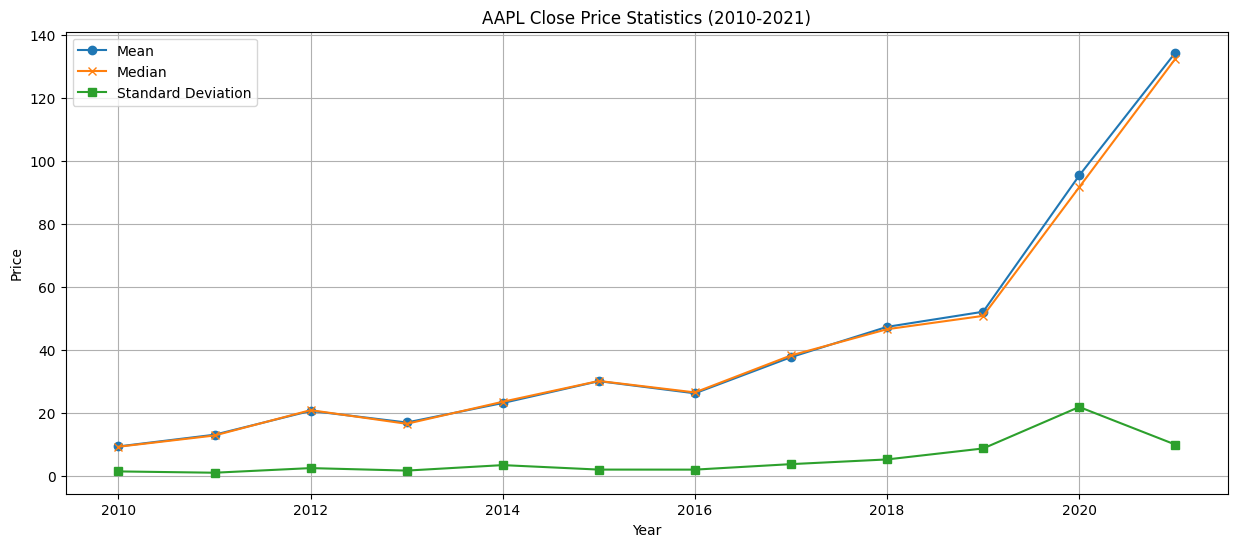

In [5]:
# Convert to pandas DataFrame because Matlplotlib does not support Polars DataFrames
# yearly_stats_pd = yearly_stats.to_pandas()

generate_plot(yearly_stats)

assert os.path.exists("pictures/plot.png"), "'plot.png' was not created."